<a href="https://colab.research.google.com/github/PhinyadaPhen/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [7]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas
import pandas as pd

In [8]:
Name = 'ภิญญาดา เพ็ญสุข'
ID = '6230210522'

In [9]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [10]:
Data = DataGenerator(Name,ID)

021:22:12


In [11]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-8.590591,-3.384560,6.182718,-10.013727,-3.798767,-10.386514,-4.951959,4.412683,-4.209981,2.053323,-9.436627,7.189614,-7.128790,-6.411139,-1.171090,8.044543,4.895843,9.009631,5.613588,-2.318265,-2.903407,3.881669,-6.769120,21.408343
1,-1.780529,-4.050530,5.651998,-2.922966,-5.314078,-3.230391,4.816577,-4.308441,-5.471005,7.333923,1.486305,4.574943,8.483905,-3.641024,2.156536,-7.497718,8.401389,5.533454,2.371273,-5.433469,9.923802,-8.043338,-8.101059,-38.216691
2,-1.317042,-5.234922,5.785962,-2.759441,-4.191934,-1.691788,4.471417,-6.076208,-6.237195,7.449835,1.632279,4.951774,9.081778,-6.340779,1.470355,-5.382698,9.529785,6.343260,4.176402,-5.876628,9.225844,-9.399084,-10.469844,-44.995422
3,-2.890972,7.835401,8.801621,5.784255,1.195772,-6.683487,-4.455486,-4.591505,-2.522932,-0.802568,1.440209,-7.198531,5.487459,5.718287,5.860904,-3.967740,3.116904,3.084671,-2.715012,-1.836151,8.548597,0.524378,15.670803,4.621891
4,0.696475,-5.034636,5.928600,-5.211910,-6.003475,-1.638056,2.014188,-5.219334,-4.721540,8.374975,-0.454258,5.993044,7.062063,-4.993895,-0.792897,-6.587069,7.754338,5.317533,2.988931,-5.168134,9.749888,-9.344624,-10.069272,-44.723122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.578964,-3.595504,5.054173,-9.940088,-7.124007,-8.085441,-2.769145,2.588654,-5.477224,-0.194023,-8.711575,9.566052,-5.875453,-8.826926,-0.212664,6.717171,4.442475,8.913906,3.078284,-2.253711,-0.051820,3.362835,-7.191008,18.814176
9996,-6.233917,6.662471,8.533216,6.878110,0.480179,-5.905370,-5.053298,-3.598717,-3.335469,-1.148128,2.537946,-4.728113,5.028287,2.578534,8.117830,-4.211865,3.209944,4.391970,-2.225402,0.004109,5.442513,3.070636,13.324941,17.353181
9997,9.641212,-5.273755,-5.130493,6.274294,-4.651740,3.422169,8.745878,-7.716951,5.570299,-10.243794,-0.618124,-2.897298,4.748631,4.693753,-8.963484,-6.874213,1.495819,3.947954,-7.892559,1.745546,-5.095021,-0.374443,-10.547509,0.127783
9998,-1.583269,3.391245,-3.536525,2.780576,-0.937440,-7.751907,9.043572,-2.629062,-7.243474,-9.298432,-0.461757,-6.511084,4.468788,-7.858024,-10.332272,-7.718783,5.525522,3.399530,5.189234,7.473903,-6.619214,-0.209460,6.782490,0.952698


In [12]:
Data.shape # ดูขนาดของข้อมูล Data

(10000, 24)

# 1. ทำ Clustering แล้วทำ Visualize ข้อมูลแบบ 2 มิติ

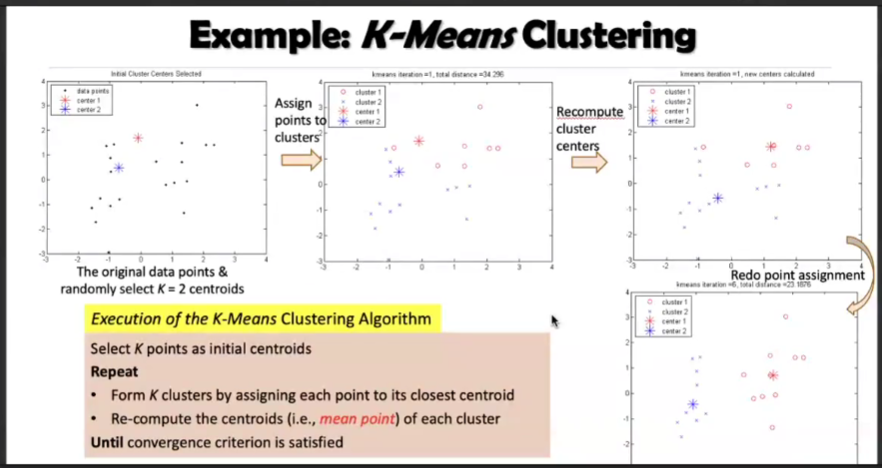

###KMean

1. กำหนดหรือสุ่มค่าเริ่มต้น จำนวน k ค่า (กลุ่ม) และกำหนดจุดศูนย์กลางเริ่มต้น k จุด เรียกว่า cluster centers หรือ centroid

2. นำจุดทั้งหมดจัดเข้ากลุ่ม โดยทำการหาค่าระยะห่างระหว่างข้อมูล กับจุดศูนย์กลาง หากข้อมูลไหนใกล้ค่าจุดศูนย์กลางตัวไหนที่สุด ก็จะอยู่กลุ่มนั้น

3. หาค่าเฉลี่ย แต่ละกลุ่มให้เป็นค่าจุดศูนย์กลางใหม่

4. ทำซ้ำข้อ 2 จนกระทั่งค่าเฉลี่ยจุดศูนย์กลางในแต่ละกลุ่มจะไม่เปลี่ยนแปลง จึงหยุดทำ

import

In [13]:
from sklearn.cluster import KMeans

Define

In [14]:
kmeans = KMeans(n_clusters=2)  # หรือไม่ต้อง set ค่า k ก็ได้

Fit-transform

* คำนวณหาจุด cluster center ของข้อมูล Data ด้วยวิธี K-Means clustering

In [15]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

* แสดงจุด cluster center ที่คำนวณออกมาได้

In [16]:
kmeans.cluster_centers_

array([[  2.31275335,  -0.73466252,   0.31673758,   1.42950861,
          3.2916698 ,   3.50019558,   1.06313516,  -3.63231485,
          1.44637978,  -0.6613262 ,   3.07350551,   2.52476248,
          4.07251509,   1.90202844,   4.33624582,  -3.03118871,
          7.53530693,   0.72405179,   3.68770551,  -1.34886669,
          4.80265347,  -7.75900429,  -1.46932504, -36.79502144],
       [  1.51789998,   1.53746885,   1.64885521,   0.93036502,
         -1.8415187 ,  -1.23338979,   1.14911788,  -1.75227839,
         -3.08868309,  -2.60182838,  -2.28667133,   0.23918935,
          1.8121895 ,  -2.92862389,   1.00497304,  -2.85851709,
          2.37219228,   0.79702826,  -0.4264177 ,  -1.0611875 ,
          0.66867981,   1.71796708,   3.07493771,  10.58983541]])

* ทดสอบการจัดกลุ่มของข้อมูล

In [17]:
a = kmeans.predict(Data)
a

array([1, 0, 0, ..., 1, 1, 1], dtype=int32)

### Visualize ข้อมูลแบบ 2 มิติ

* ทำ PCA ลด Dimention ข้อมูล

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

new_pca = pca.fit_transform(Data)

from matplotlib import pyplot as plt

In [19]:
import matplotlib

In [20]:
matplotlib.rcParams['figure.figsize']=[20,20] # ขยายตารางให้ดูการกระจายข้อมูลในกราฟได้ชัดขึ้น เนื่องจากมีการกระจายข้อมูลซ้อนทับกันมาก

In [21]:
new_pca

array([[-24.98774261, -12.5470899 ],
       [ 38.43197383,  -1.87986518],
       [ 45.57100436,  -3.15279585],
       ...,
       [  3.59863442, -15.32159545],
       [ -4.13380311,  -2.71663962],
       [  4.2429027 ,   3.84552382]])

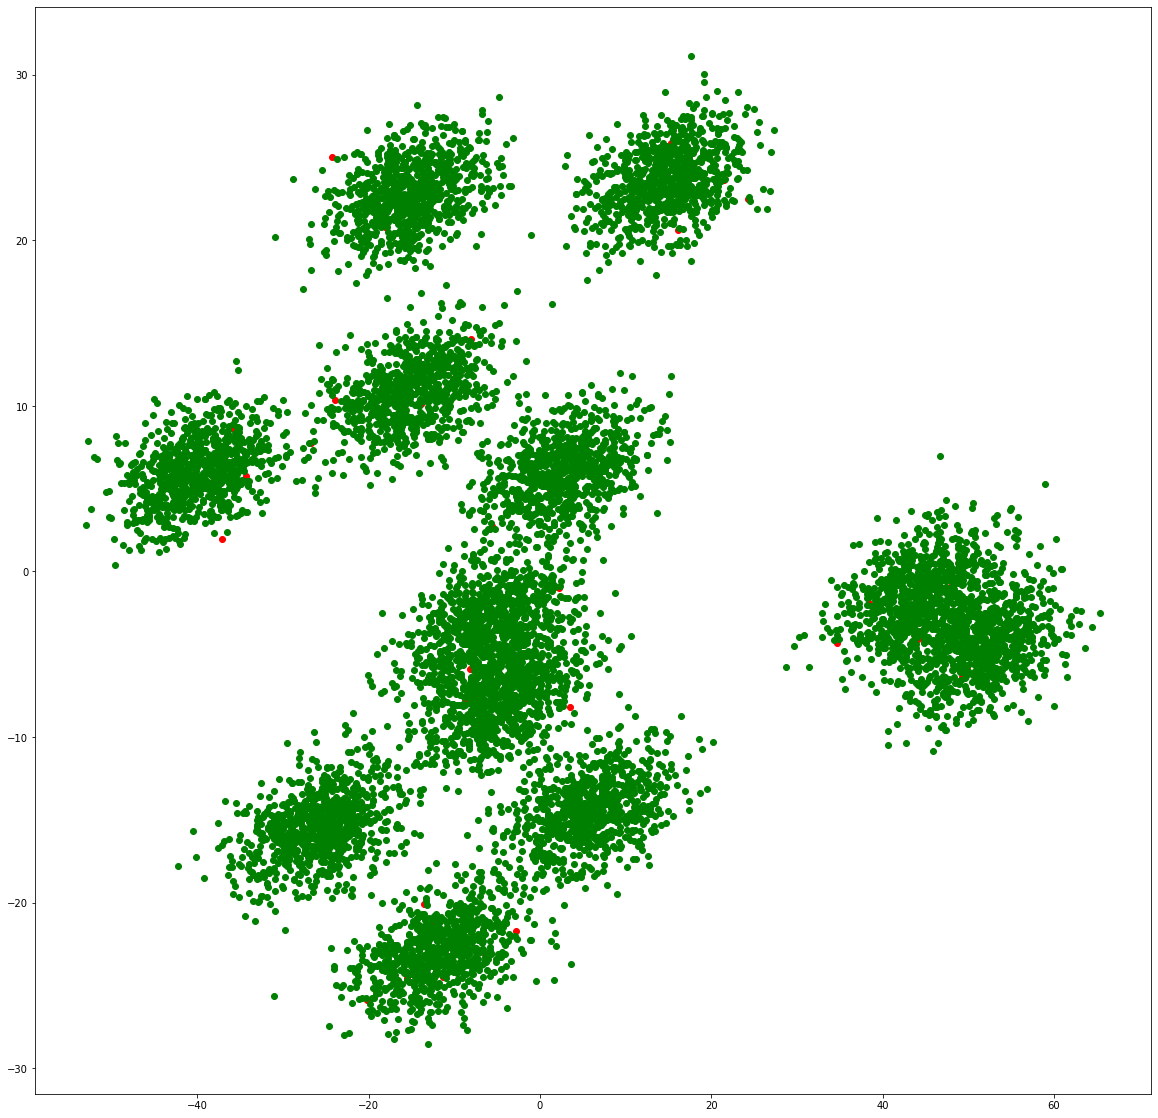

In [22]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:,0],new_pca[50:,1],'og')

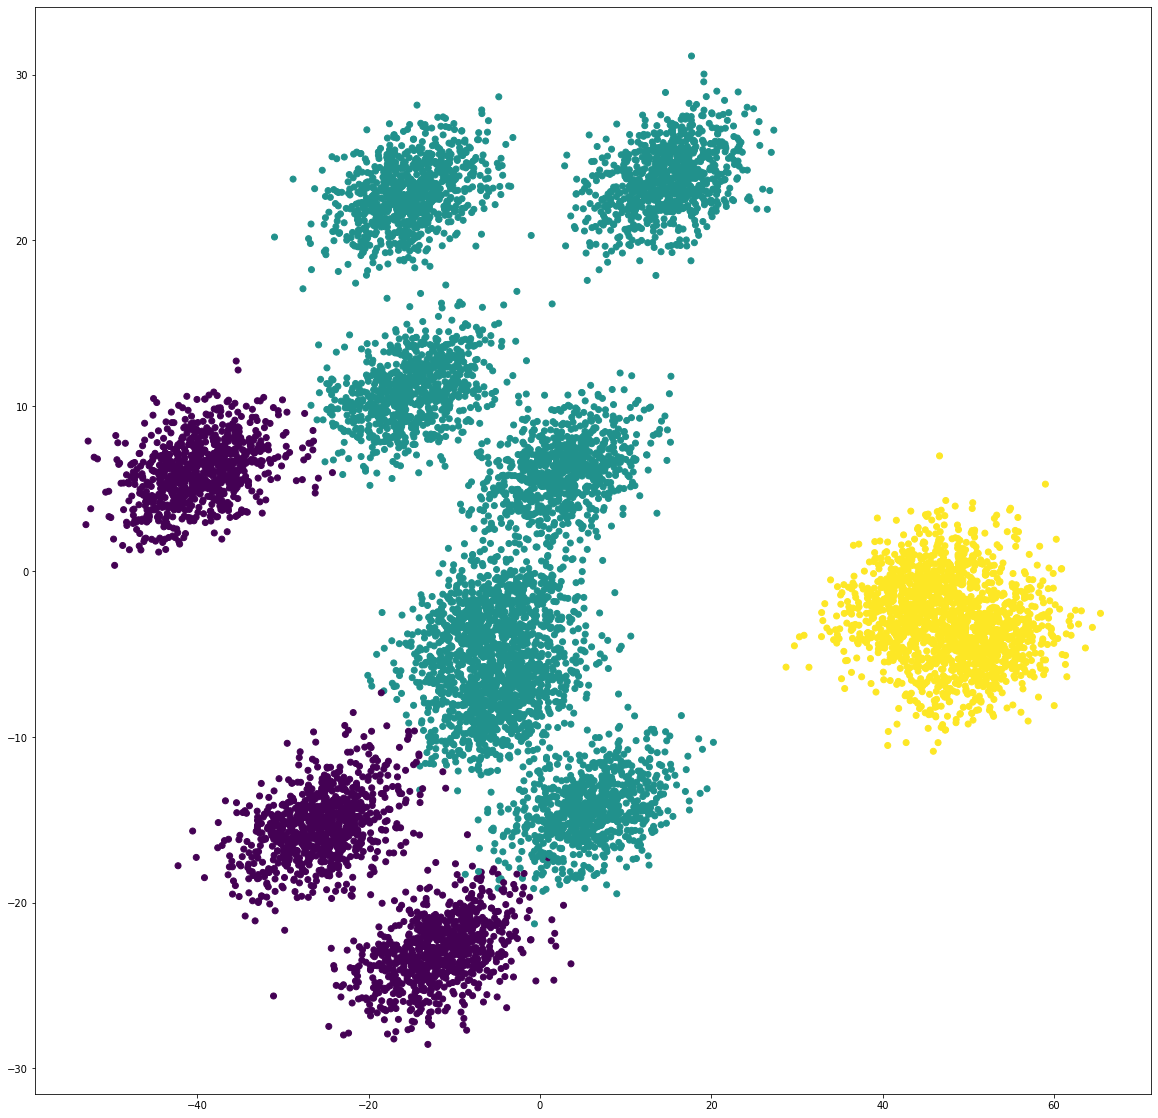

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Data)
a = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1], c=a)

In [24]:
kmeans.cluster_centers_

array([[-7.50708778e-02,  1.03253545e-01,  1.39963381e+00,
        -7.02114299e+00, -7.02555285e+00, -2.23852660e+00,
        -2.30344040e+00, -2.11030085e+00, -4.60300972e+00,
        -3.56205029e+00, -2.97618724e+00,  1.31512217e+00,
        -1.51821443e+00, -4.95088752e+00,  8.69501622e-01,
         3.71868167e+00,  2.21959809e+00, -2.71935286e+00,
         2.45767560e-01, -5.64763544e+00, -1.19164597e+00,
         4.21851214e+00,  2.06507091e-01,  2.30925607e+01],
       [ 3.28769172e+00,  2.84091305e+00,  2.04032138e+00,
         4.19105954e+00,  1.74599913e+00,  3.01787264e-03,
         1.22936002e+00, -9.32996702e-01, -1.80817231e+00,
        -1.89539888e+00, -1.87134713e+00, -6.30116126e-01,
         2.44708030e+00, -9.33115408e-01,  1.49260811e+00,
        -6.23916226e+00,  2.81035604e+00,  2.98555125e+00,
        -5.45031200e-02,  3.70553354e-01,  9.39962873e-01,
        -2.16722925e-01,  5.68182610e+00,  9.16385377e-01],
       [-1.07370880e+00, -4.17122542e+00, -1.29456817e

In [25]:
new_cluster_center = pca.transform(kmeans.cluster_centers_)

In [26]:
new_cluster_center

array([[-25.79801901, -10.68529397],
       [ -2.49142115,   5.48715374],
       [ 47.77272319,  -2.94758779]])

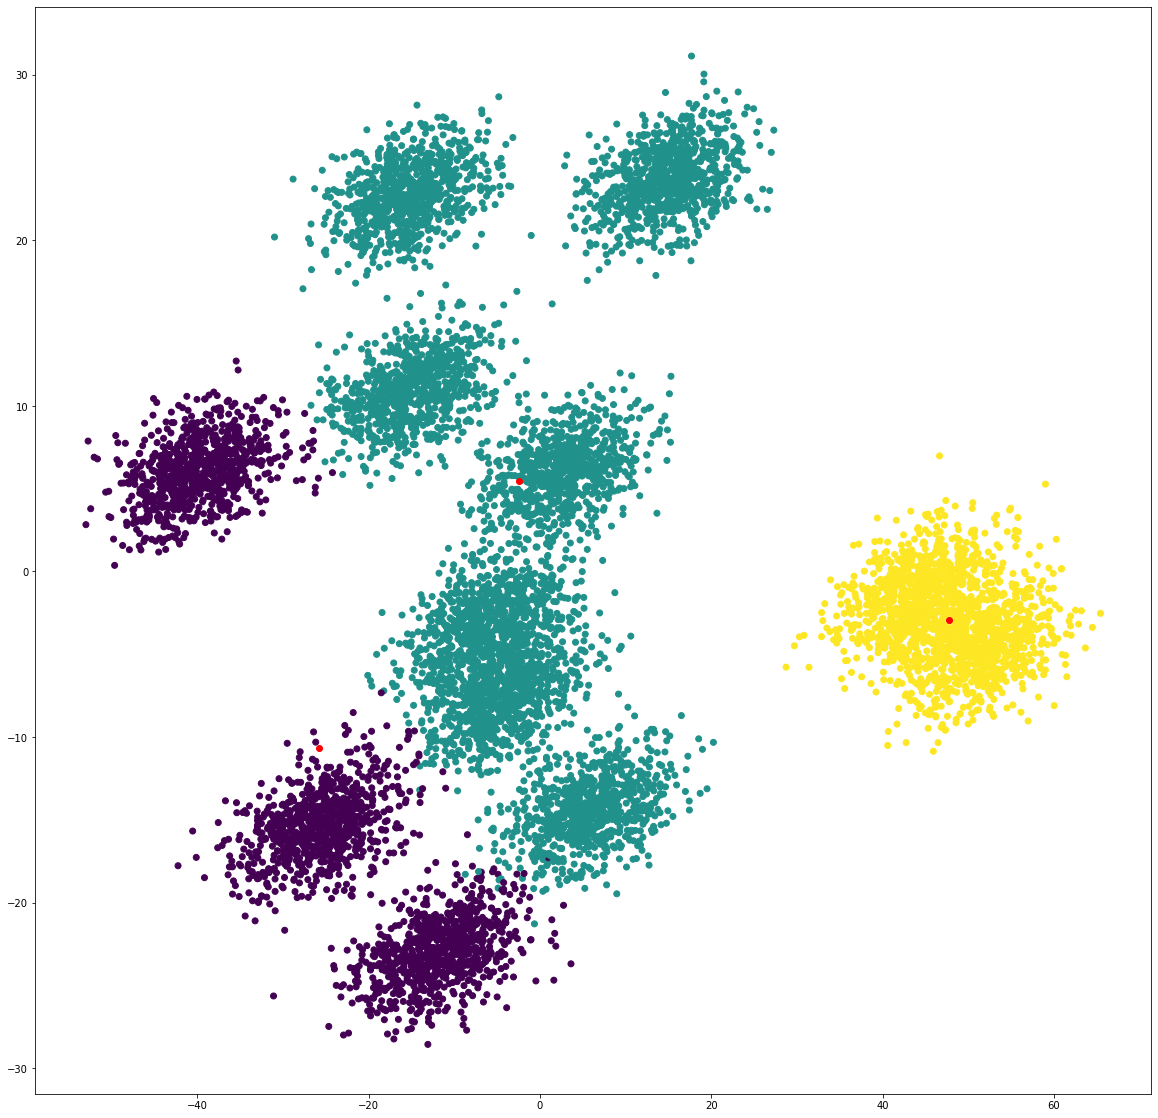

In [27]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=a)
plt.plot(new_cluster_center[:,0],new_cluster_center[:,1],'or')

###The elbow method

SSE = Sum of squared Error 
คำนวณหาค่า SSE ของข้อมูล

In [28]:
kmeans.inertia_  

7422138.733043061

In [29]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(Data)
  SSE.append(kmeans.inertia_)

In [30]:
SSE

[13879602.78433308,
 9122631.782264048,
 7422139.144649109,
 6068139.751892064,
 4836369.819693639,
 4013266.7126697237,
 3151727.1785474457,
 2500806.4740088503]

Text(0, 0.5, 'SSE')

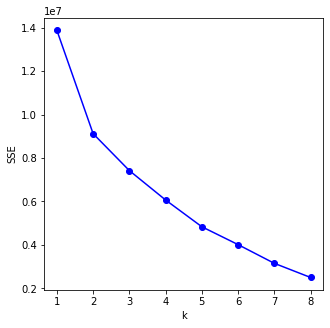

In [31]:
# นำค่า SSE ที่ได้ มา plot กราฟเพื่อดูว่ามี k กี่กลุ่ม
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE')

จากกราฟจะเห็นได้ว่ามี k ทั้งหมด 4 กลุ่ม โดยระยะห่างระหว่างจุดที่ 5 จะมีระยะห่างระหว่างจุดใกล้กันกับ 6, 7, 8

Silhouette coefficient


*  How close the data point is to other points in the cluster (จุดข้อมูลอยู่ใกล้กับจุดอื่น ๆ ในคลัสเตอร์มากเพียงใด)
*   How far away the data point is from points in other clusterss (จุดข้อมูลอยู่ห่างจากจุดในคลัสเตอร์อื่นมากเพียงใด)



In [32]:
from sklearn import metrics # เรียกใช้ฟังก์ชั่น metrics

In [33]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(Data)
  score = metrics.silhouette_score(Data,kmeans.labels_)
  SilH.append(score)

Text(0, 0.5, 'SilH')

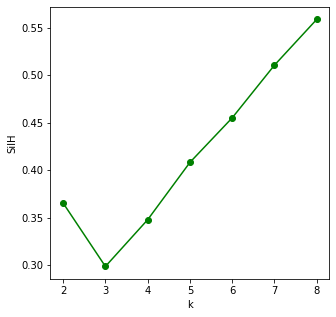

In [34]:
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('SilH')

จากกราฟจะเห็นได้ว่ามี k ทั้งหมด 2 กลุ่ม โดยระยะห่างระหว่างจุดที่ 3 จะมีระยะห่างระหว่างจุดใกล้กันกับ 4, 5, 6, 7, 8
หรือช่วง 2 และ 3

Text(0, 0.5, 'Y')

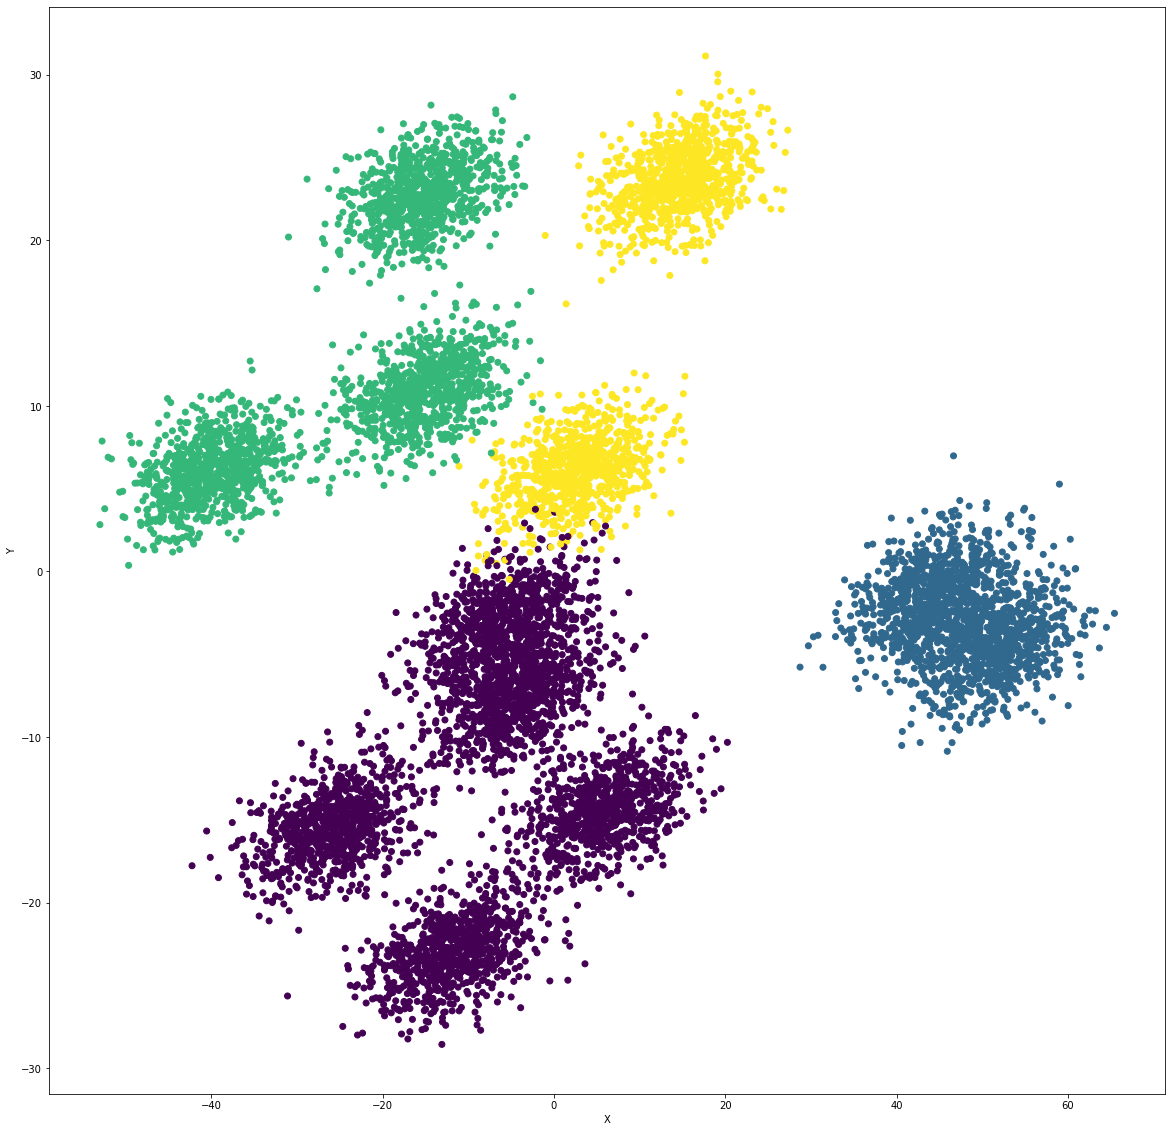

In [35]:
# นำข้อมูลมาจัดกลุ่มใหม่ set k = 4 
matplotlib.rcParams['figure.figsize']=[20,20]
kmeans = KMeans(n_clusters=4)
kmeans.fit(Data)
a = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1], c=a)
plt.xlabel('X')
plt.ylabel('Y')

# 2. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

* ทำ MDS ดูระยะห่างของจุดแต่ละจุด

In [36]:
from sklearn.manifold import MDS

In [37]:
mds = MDS(n_components=2)

In [ ]:
new_mds = mds.fit_transform(Data)

###KMean

In [ ]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(Data)
b = kmeans2.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1], c=a)
plt.xlabel('X')
plt.ylabel('Y')